**PCA - PRINCIPLE COMPONENT ANALYSIS**

In [ ]:
from google.colab import files
file_uploaded = files.upload()

Saving Mall_Customers.csv to Mall_Customers.csv


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.pipeline import Pipeline

In [ ]:
Data = pd.read_csv("/content/Mall_Customers.csv")

**DATA TO DATA CONVERT**

In [ ]:
df=Data # KMeans + PCA
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [ ]:
x = df[["Annual Income (k$)","Spending Score (1-100)"]]

In [ ]:
pipe = Pipeline(
[
("scaler",StandardScaler()),
("pca",PCA(n_components=2)),
("kmeans",KMeans(n_clusters=5,random_state=42))
]
)

In [ ]:
pipe.fit(x)

Pipeline(steps=[('scaler', StandardScaler()), ('pca', PCA(n_components=2)),
                ('kmeans', KMeans(n_clusters=5, random_state=42))])

In [ ]:
labels = pipe["kmeans"].labels_
df["cluster"]=labels

In [ ]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster
0,1,Male,19,15,39,4
1,2,Male,21,15,81,2
2,3,Female,20,16,6,4
3,4,Female,23,16,77,2
4,5,Female,31,17,40,4


In [ ]:
x_pca = pipe["pca"].transform(pipe["scaler"].transform(x))

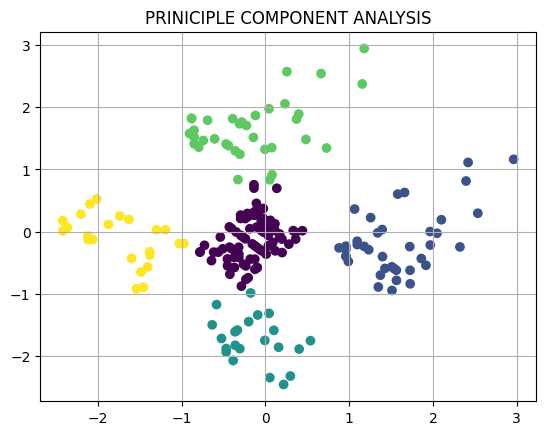

In [ ]:
plt.scatter(x_pca[:,0],x_pca[:,1],c=labels)
plt.title("PRINICIPLE COMPONENT ANALYSIS")
plt.grid(True)
plt.show()